## _Importing relavant libraries_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import warnings
import pandas_profiling as pp
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
plt.style.use('seaborn-whitegrid')



import statsmodels.api as sm
import statsmodels.formula.api as smf

import researchpy as rp

from scipy.stats import kurtosis,skew

%matplotlib inline
sns.set()

ModuleNotFoundError: No module named 'pandas_profiling'

In [28]:
supermarket_data=pd.read_csv('supermarket_till_transactions.csv')

1.What is the proportion of the target variable. In this case it is Spend

In [29]:
#Get the value counts of the target variable
spend_df=supermarket_data["SPEND"].value_counts();spend_df.sample(10)
spend_df1=spend_df.rename_axis("spend").reset_index('spend')
spend_df1.sample(10)

,spend,SPEND
72,499,1
56,219,1
22,80,1
38,27,1
62,465,1
86,1406,1
36,24,1
26,13,1
61,456,1
63,211,1


In [30]:
#Get the value counts of the target variable
customer_life_stage_vc=supermarket_data["CUST_LIFESTAGE"].value_counts()
customer_life_stage_df=customer_life_stage_vc.rename_axis('life_stage').reset_index(name='counts')
customer_life_stage_df

,life_stage,counts
0,OT,38
1,YF,14
2,OA,11
3,OF,6
4,YA,4


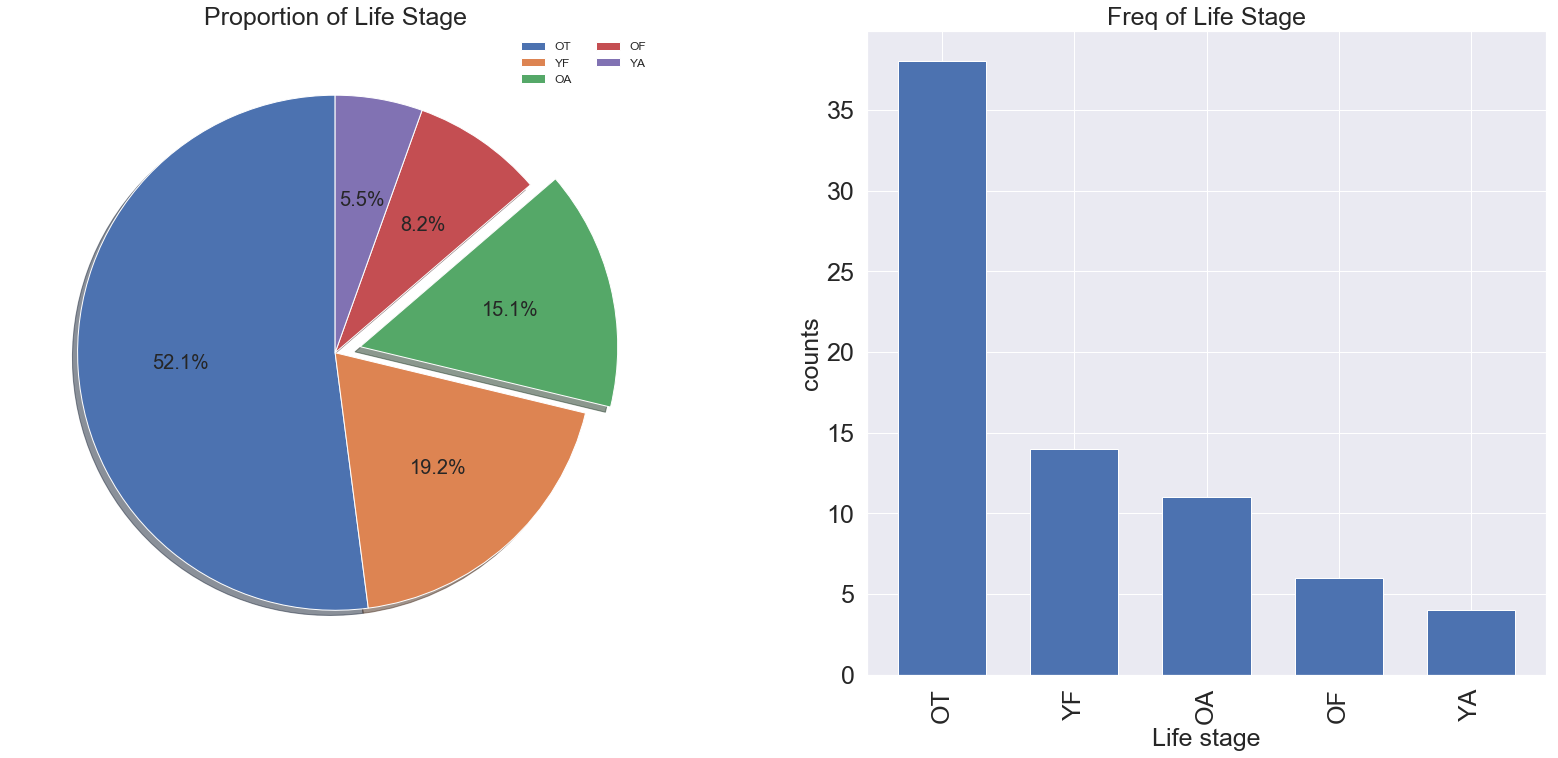

In [31]:
#define labels
life_stage_labels='OT','YF','OA','OF','YA'

#Choose which proportion to explode

life_stage_explode=(0,0,0.1,0,0)

#create a container which will hold the subplots

life_stage_fig=plt.figure(figsize=(25,12))

#create a frame using grid spec
gs = gridspec.GridSpec(6,7)

#set subplot to visualize the pie chart
pie_ax01 = plt.subplot(gs[0:,:-3])
pie_ax01.set_title(label="Proportion of Life Stage", fontdict={"fontsize":25})

pie_ax01.pie(
    customer_life_stage_df['counts'],
    explode=life_stage_explode,
    autopct="%1.1f%%",
    shadow=True,
    startangle=90,
    textprops={'fontsize':20}
)
pie_ax01.legend(life_stage_labels,loc=0,fontsize=12,ncol=2)

#set subplot to visualize the bar graph
bar_ax01 = plt.subplot(gs[:6,4:], )
life_stage_label_list = customer_life_stage_df["life_stage"]
life_stage_freq = customer_life_stage_df["counts"]
index = np.arange(len(life_stage_label_list))

width=1/1.5

bar_ax01.set_title(label="Freq of Life Stage",fontdict={'fontsize':25})
bar_ax01.set_xlabel(xlabel='Life stage',fontdict={'fontsize':25})
bar_ax01.set_ylabel(ylabel="counts",fontdict={'fontsize':25})
bar_ax01.set_xticklabels(life_stage_label_list,rotation='vertical',fontdict={'fontsize':25})
bar_ax01.set_yticklabels(np.arange(0,40,5),rotation='horizontal',fontdict={'fontsize':25})


bar_ax01.bar(life_stage_label_list, life_stage_freq, width)
plt.tight_layout(pad=5)
plt.show()

## Descriptive Statistics

**Am trying to at hour the spend and shop hour relate in a retail industry**

In [32]:
sp=supermarket_data['SPEND'];sp.shape

(119,)

In [33]:
sh=supermarket_data['SHOP_HOUR'];sh.sample(5)

113    15
15     15
105    12
72     16
59      9
Name: SHOP_HOUR, dtype: int64

In [34]:
supermarket_data.shape

(119, 22)

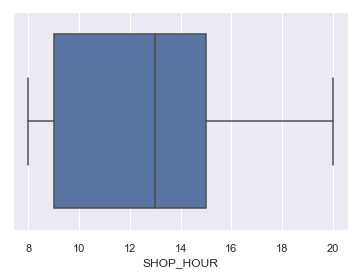

In [35]:
sns.boxplot(x=sh)

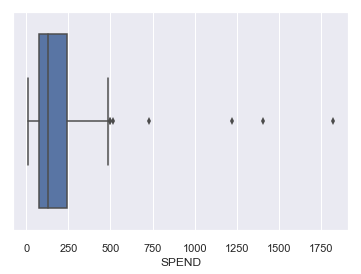

In [36]:
sns.boxplot(x=sp)

In [37]:
#print the Inter-Quartile Range
Q1=sp.quantile(0.25)
Q3=sp.quantile(0.75)
IQR=Q3- Q1
print(IQR)

166.5


In [38]:
spd = sp[~((sp < (Q1-1.5 * IQR)) | (sp > Q3 + (1.5 * IQR) ))]
spd.shape

(112,)

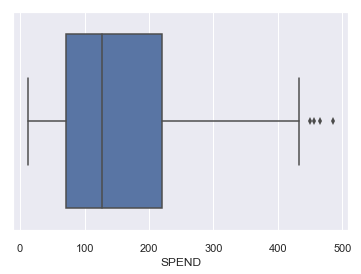

In [39]:
sns.boxplot(x=spd)

<function matplotlib.pyplot.show(*args, **kw)>

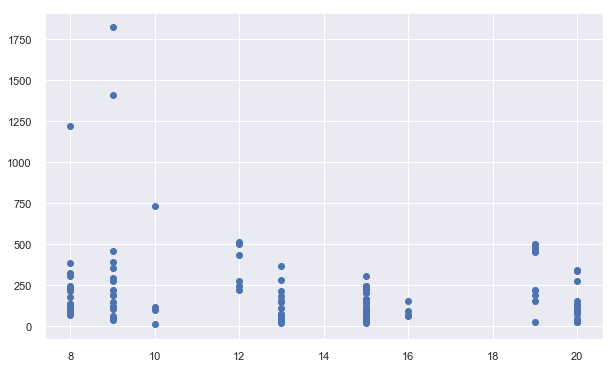

In [40]:
#plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(sh,sp)
ax.set_xlabel=('Shop hour')
ax.set_ylabel=('Spend')

plt.show

Using this scatter plot we can somehow see that the shopping hours is between 8am to 8pm.
Where most customers are likely to spend between 0-500(Kshs)

In [41]:
supermarket_data.sample(5)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
71,200607,20060414,6,16,1,63,PRD0902008,CL00018,DEP00005,G00003,...,LA,OA,994100100540328,M,LA,Small Shop,Fresh,STORE00051,MS,W02
49,200607,20060410,2,9,1,391,PRD0900782,CL00086,DEP00024,G00007,...,NaN,NaN,994100100014637,L,UM,Full Shop,Mixed,STORE00013,LS,N02
87,200607,20060412,4,13,1,154,PRD0904358,CL00063,DEP00019,G00007,...,NaN,NaN,994100100058515,L,UM,Top Up,Fresh,STORE00078,LS,S01
13,200607,20060414,6,15,1,65,PRD0900302,CL00037,DEP00010,G00004,...,LA,OT,994100100206797,L,LA,Top Up,Fresh,STORE00002,LS,W01
89,200607,20060412,4,15,1,103,PRD0900292,CL00108,DEP00037,G00010,...,NaN,NaN,994100100088144,L,LA,Top Up,Fresh,STORE00103,MS,N03


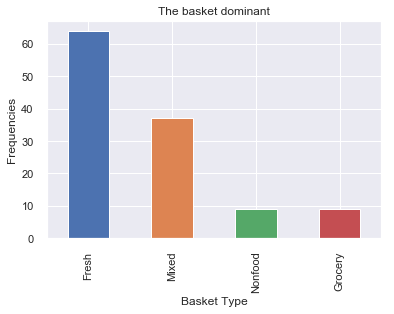

In [42]:
supermarket_data.BASKET_DOMINANT_MISSION.value_counts().nlargest(40).plot(kind='bar')
plt.title('The basket dominant')
plt.xlabel('Basket Type')
plt.ylabel('Frequencies')
plt.show()

In [43]:
x=supermarket_data['SPEND'].mean()
x

203.10084033613447

In [44]:
data1=supermarket_data[['SPEND','SHOP_HOUR','QUANTITY']];data1.sample(10)

,SPEND,SHOP_HOUR,QUANTITY
13,65,15,1
43,226,8,1
35,326,8,1
50,125,9,1
40,80,8,1
81,74,13,1
25,92,15,1
31,118,8,1
11,340,20,4
77,182,13,1


In [45]:
x2=data1.describe()
x2

,SPEND,SHOP_HOUR,QUANTITY
count,119.000000,119.000000,119.000000
mean,203.100840,13.420168,1.512605
std,248.774637,4.049473,1.227272
min,13.000000,8.000000,1.000000
25%,74.500000,9.000000,1.000000
50%,132.000000,13.000000,1.000000
75%,241.000000,15.000000,1.000000
max,1820.000000,20.000000,9.000000


In [46]:
#calculating the skewness of the data
x3=data1.skew()
x3

SPEND        4.031387
SHOP_HOUR    0.164604
QUANTITY     3.215793
dtype: float64

Since |coef| >1 ,the distribution is said to be highly skewed. Thus spend is highly skewed with quantity.
While shop hour is slightly skewed

In [47]:
#calculating the kurtosis for the data
x4=data1.kurtosis();x4

SPEND        20.539802
SHOP_HOUR    -1.110805
QUANTITY     13.266849
dtype: float64

In [49]:
np.var(data1)

SPEND        61368.746134
SHOP_HOUR       16.260434
QUANTITY         1.493539
dtype: float64

(array([ 9.,  8.,  9.,  9., 14.,  5.,  8.,  9.,  3.,  5.,  2.,  7.,  5.,
         0.,  4.,  1.,  2.,  2.,  1.,  2.,  2.,  0.,  0.,  1.,  2.,  1.,
         3.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  13.  ,   31.07,   49.14,   67.21,   85.28,  103.35,  121.42,
         139.49,  157.56,  175.63,  193.7 ,  211.77,  229.84,  247.91,
         265.98,  284.05,  302.12,  320.19,  338.26,  356.33,  374.4 ,
         392.47,  410.54,  428.61,  446.68,  464.75,  482.82,  500.89,
         518.96,  537.03,  555.1 ,  573.17,  591.24,  609.31,  627.38,
         645.45,  663.52,  681.59,  699.66,  717.73,  735.8 ,  753.87,
        

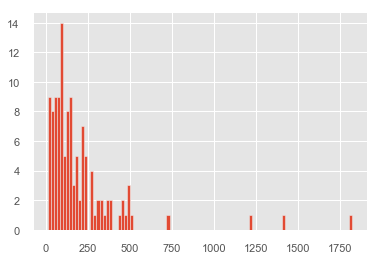

In [50]:
#Histogram to visualize spend
fig
plt.style.use('ggplot')
x5=supermarket_data['SPEND']
plt.hist(x5,bins=100)

**Spend seems to be also positively skewed.**

In [51]:
data1_mode=data1.mode()
data1_mode

,SPEND,SHOP_HOUR,QUANTITY
0,101,15,1


## Inferential Statistics

We can say that, a sample of 100 people their average spending amount will be 200. Given the population average is 203.
- Thus :

- Null Hypothesis: The mean is equal to 200
- Alternative hypothesis :The mean is not equal to 200


Using 5% as significance level


In [52]:
#Calculating T Test for 
from scipy.stats import ttest_1samp
sh1=supermarket_data["SPEND"]
sh1_mean=sh1.mean()
print(sh1_mean)

tset, pval = ttest_1samp(sh1,100
                        )
print('Pvalue',pval)
print('t test',tset)

203.10084033613447
Pvalue 1.4737038853695829e-05
t test 4.520948748613231


Since the pvalue is less than 0.05 thus we reject the null hypothesis.

We can also confirm this by test statictics and the critical value which is 1.96.
Thus 4.5 > 1.96 we reject the null hypothesis.


THEREFORE THERE IS ENOUGH EVIDENCE TO INDICATE THAT THE AVERAGE SPEND PER DAY IS NOT EQUAL TO 200/= THUS WE REJECT THE CLAIM

In [53]:
supermarket_data.head()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,200607,20060413,5,20,1,103,PRD0900097,CL00001,DEP00001,G00001,...,LA,YF,994100100532898,L,LA,Top Up,Fresh,STORE00001,LS,E02
1,200607,20060412,4,19,1,28,PRD0900353,CL00070,DEP00020,G00007,...,LA,YF,994100100532897,M,MM,Small Shop,Fresh,STORE00001,LS,E02
2,200607,20060413,5,20,3,84,PRD0900550,CL00167,DEP00055,G00016,...,LA,YF,994100100532898,L,LA,Top Up,Fresh,STORE00001,LS,E02
3,200607,20060412,4,19,1,221,PRD0901647,CL00010,DEP00003,G00002,...,LA,YF,994100100532897,M,MM,Small Shop,Fresh,STORE00001,LS,E02
4,200607,20060413,5,20,1,334,PRD0902064,CL00073,DEP00021,G00007,...,LA,YF,994100100532898,L,LA,Top Up,Fresh,STORE00001,LS,E02
